# 🎨🖌️ Synthetic Data Generation

The third dataset is generated using Google's Imagen v3. Canvases and objects are created separately and then combined so bounding boxes can be generated.

Number of images:
- `Training = 20264 / 4 = 5066`
- `Validation = 4304 / 4 = 1076`

Test data will reuse the original data set for comparison.

In [ ]:
from google import genai
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from io import BytesIO
from dotenv import load_dotenv
from IPython.display import display
import cv2

from src import utils

## 1. Canvas Images

In [2]:
# Load the Google API key from the .env file
load_dotenv("src\\secrets.env")
GAPI_KEY = os.getenv("GAPI")

In [3]:
# List of terrain types
terrain_types = [
    "a forest",
    "a desert",
    "a mountain",
    "a beach",
    "an urban",
    "a countryside",
    "a swamp",
    "a tundra",
    "a jungle",
    "a savanna",
    "an oceanside"
]

In [4]:
# List of times of day
time_of_day = [
    "morning",
    "afternoon",
    "evening",
    "night"
]

In [5]:
# List of conditions
conditions = [
    "sunny",
    "cloudy",
    "rainy",
    "stormy",
    "foggy",
    "snowy",
    "windy",
    "clear"
]

In [6]:
# List of seasons
seasons = [
    "spring",
    "summer",
    "autumn",
    "winter"
]

In [7]:
# Example prompt
example_prompt = utils.synth.canvas_prompt(terrain_types, time_of_day, conditions, seasons, seed = 0)
print("Example prompt:\n", example_prompt)

Example prompt:
 A photo of a savanna landscape in summer at evening with foggy weather taken by a professional photographer.


In [8]:
# Connect to the Google GenAI API
client = genai.Client(api_key=GAPI_KEY)

In [9]:
# Example image from the example prompt
example_image = utils.synth.canvas_genai(client, example_prompt, 1)

In [ ]:
# Convert byte string object to PIL image
img = Image.open(BytesIO(example_image[0].image.image_bytes))

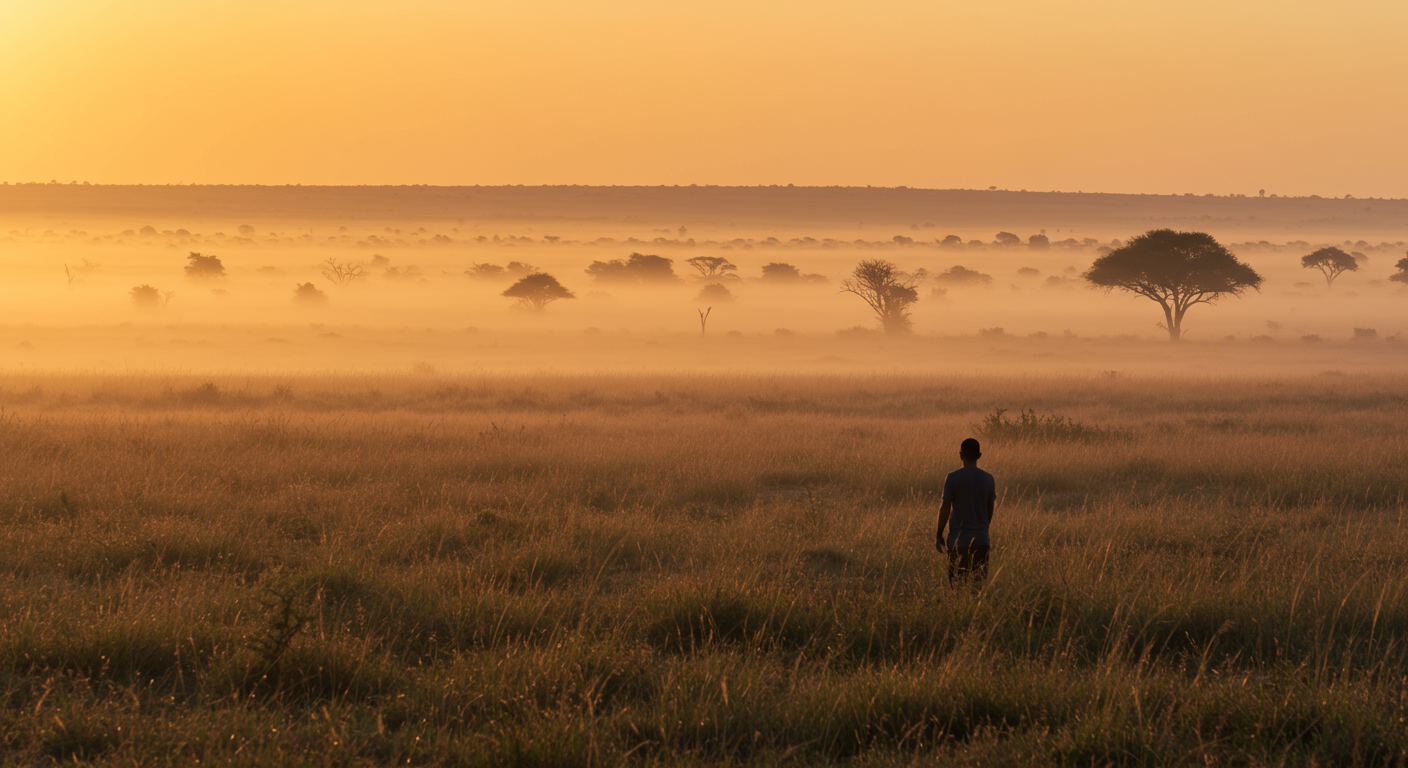

In [15]:
# Display PIL image
display(img)

### a. Training Data

In [ ]:
# Set the number of training data images to create
training_total = 5066  # Actual = 5066

In [ ]:
# Set the data directory
train_data_dir = os.path.join(utils.INTERIM_DATA_DIR, "genai_data", "train")

# Create the folders if they don't exist
os.makedirs(train_data_dir, exist_ok=True)

### b. Validation Data

In [ ]:
# Set the number of validation data images to create
validation_total = 1076  # Actual = 1076

In [ ]:
# Set the data directory
val_data_dir = os.path.join(utils.INTERIM_DATA_DIR, "genai_data", "val")

# Create the folders if they don't exist
os.makedirs(val_data_dir, exist_ok=True)